# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
number_mice = combined_df['Mouse ID'].nunique()
print(f'The number of mice in the dataset is: {number_mice}')

The number of mice in the dataset is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate mice based on Mouse ID and Timepoint")
print(duplicate_mice)

print("\nMouse IDs with duplicate entries:")
print(duplicate_mice_ids)

Duplicate mice based on Mouse ID and Timepoint
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801     

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = clean_data['Mouse ID'].nunique()
print(f'The total number of mice after removing duplicates is: {total_clean_mice}')

The total number of mice after removing duplicates is: 248


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    np.mean,
    np.median,
    np.var,
    np.std,
    st.sem
])

summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std. Dev.', 'SEM']
summary_stats = summary_stats.round(2)
summary_stats

C:\Users\maria\AppData\Local\Temp\ipykernel_26400\3798576157.py:6: FutureWarning: The provided callable <function mean at 0x0000019055F4CD60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
C:\Users\maria\AppData\Local\Temp\ipykernel_26400\3798576157.py:6: FutureWarning: The provided callable <function median at 0x00000190560C4CC0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
C:\Users\maria\AppData\Local\Temp\ipykernel_26400\3798576157.py:6: FutureWarning: The provided callable <function var at 0x0000019055F4CFE0> is currently using SeriesGroupBy.var. In a future version of pa

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

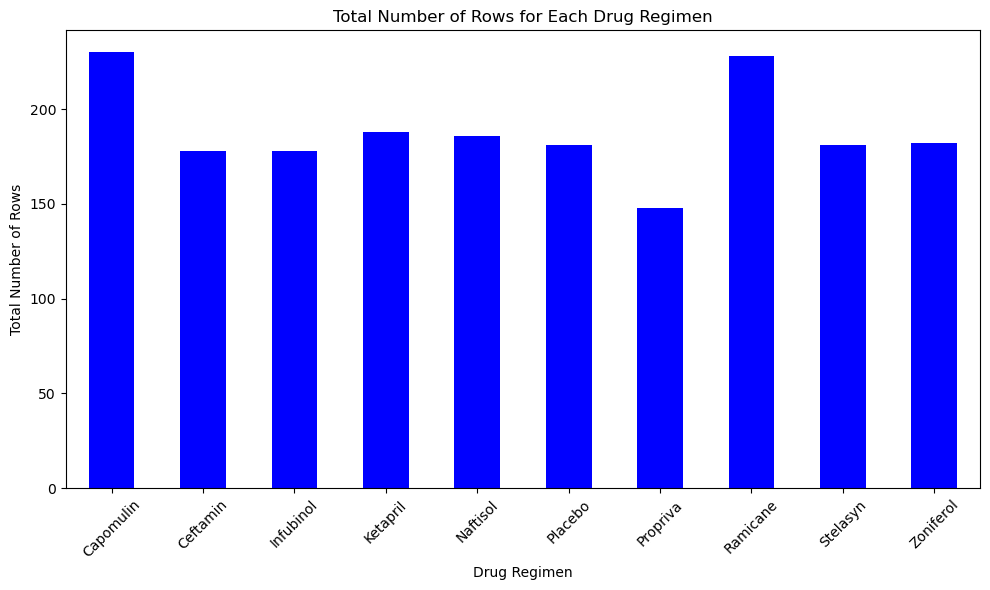

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_data.groupby('Drug Regimen').size()
total_rows.plot(kind='bar', figsize=(10,6), rot=45, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.tight_layout()
plt.show()

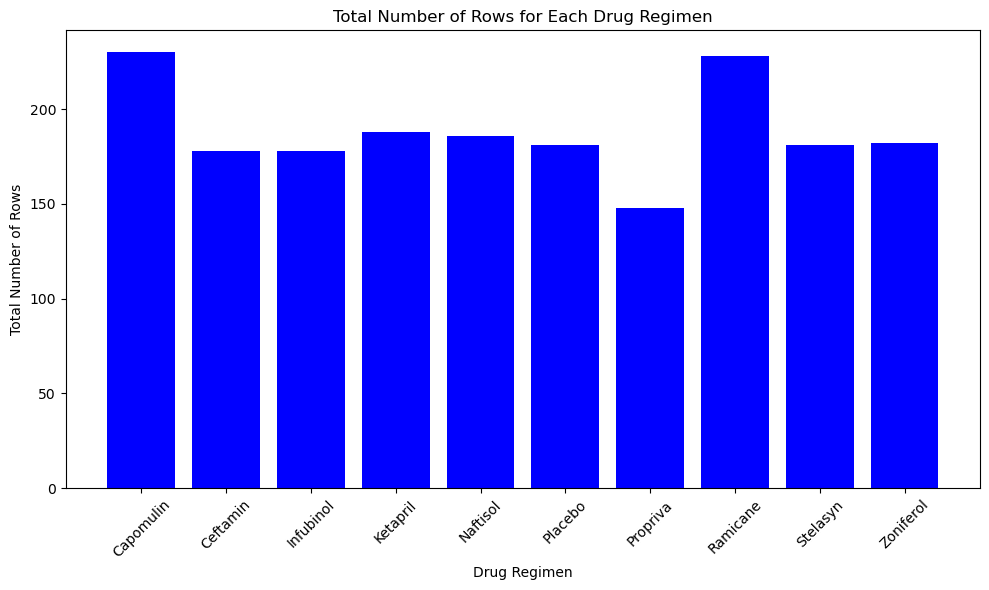

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_data.groupby('Drug Regimen').size()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(total_rows.index, total_rows, color='blue')

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Total Number of Rows')
ax.set_title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)

plt.tight_layout()

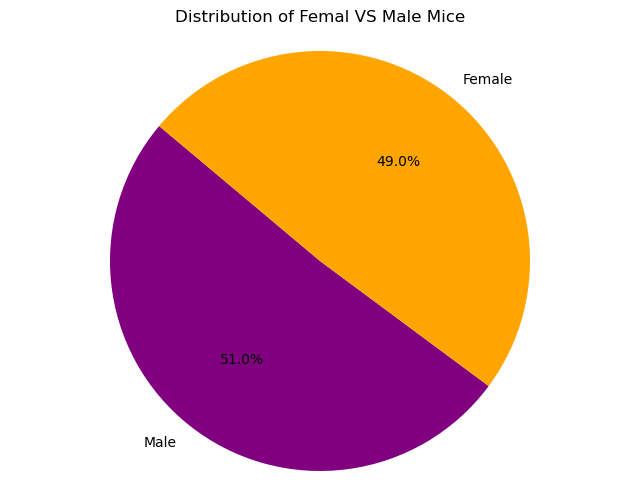

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_compare = clean_data['Sex'].value_counts()
gender_compare.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['purple', 'orange'], figsize=(8, 6))

plt.title('Distribution of Femal VS Male Mice')
plt.ylabel('')

plt.axis('equal')
plt.show()

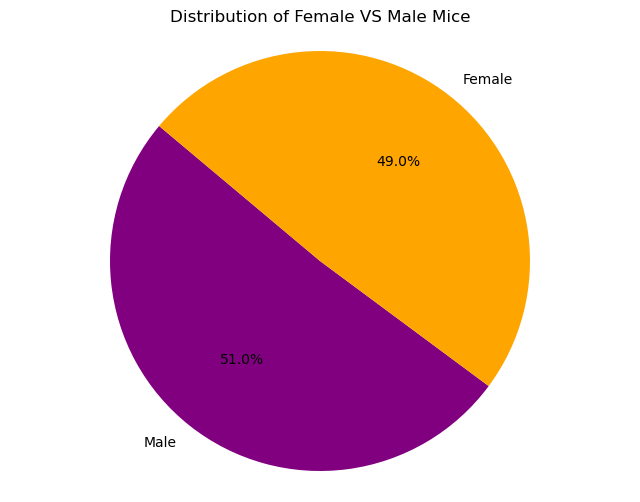

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_compare = clean_data['Sex'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(gender_compare, labels=gender_compare.index, autopct='%1.1f%%', startangle=140, colors=['purple', 'orange'])
ax.set_title('Distribution of Female VS Male Mice')
ax.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [78]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume.append(treatment_data)
    # add subset 

    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_volume[-1].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    outliers = tumor_volume[-1][(tumor_volume[-1] < lower_bound) | (tumor_volume[-1] > upper_bound)]
    print(f"Results for {treatment}")
    print(f"  Lower Quartile: {lowerq:.2f}")
    print(f"  Upper Quartile: {upperq:.2f}")
    print(f"  Interquartile Range: {iqr:.2f}")
    print(f"  Median: {quartiles[0.5]:.2f}")
    print(f"  Values below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.")
    if len(outliers) > 0:
        print("  Outliers:")
        print(outliers)
    else:
        print("  No outliers found.")
    print("-----------------------------")

Results for Capomulin
  Lower Quartile: 32.38
  Upper Quartile: 40.16
  Interquartile Range: 7.78
  Median: 38.13
  Values below 20.70 or above 51.83 could be outliers.
  No outliers found.
-----------------------------
Results for Ramicane
  Lower Quartile: 31.56
  Upper Quartile: 40.66
  Interquartile Range: 9.10
  Median: 36.56
  Values below 17.91 or above 54.31 could be outliers.
  No outliers found.
-----------------------------
Results for Infubinol
  Lower Quartile: 54.05
  Upper Quartile: 65.53
  Interquartile Range: 11.48
  Median: 60.17
  Values below 36.83 or above 82.74 could be outliers.
  Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------
Results for Ceftamin
  Lower Quartile: 48.72
  Upper Quartile: 64.30
  Interquartile Range: 15.58
  Median: 59.85
  Values below 25.36 or above 87.67 could be outliers.
  No outliers found.
-----------------------------


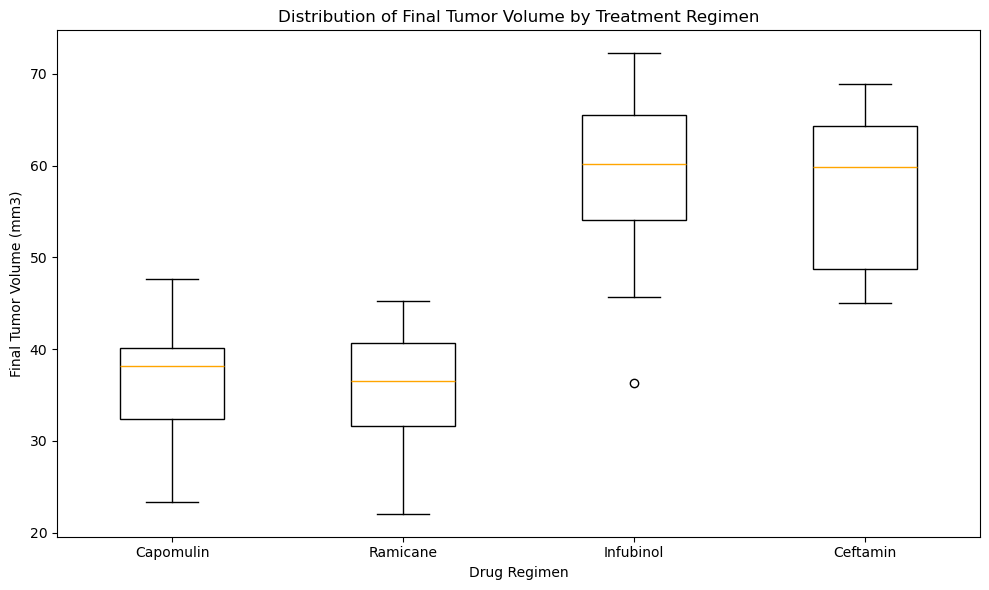

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_plot = [tumor_volume[i].values for i in range(len(treatments))]

fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(treatment_plot, patch_artist=True, medianprops=dict(color='orange'))

for patch in bp['boxes']:
    patch.set_facecolor('white')
    patch.set_edgecolor('black')

ax.set_xticklabels(treatments)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume by Treatment Regimen')


plt.tight_layout()
plt.show()

## Line and Scatter Plots

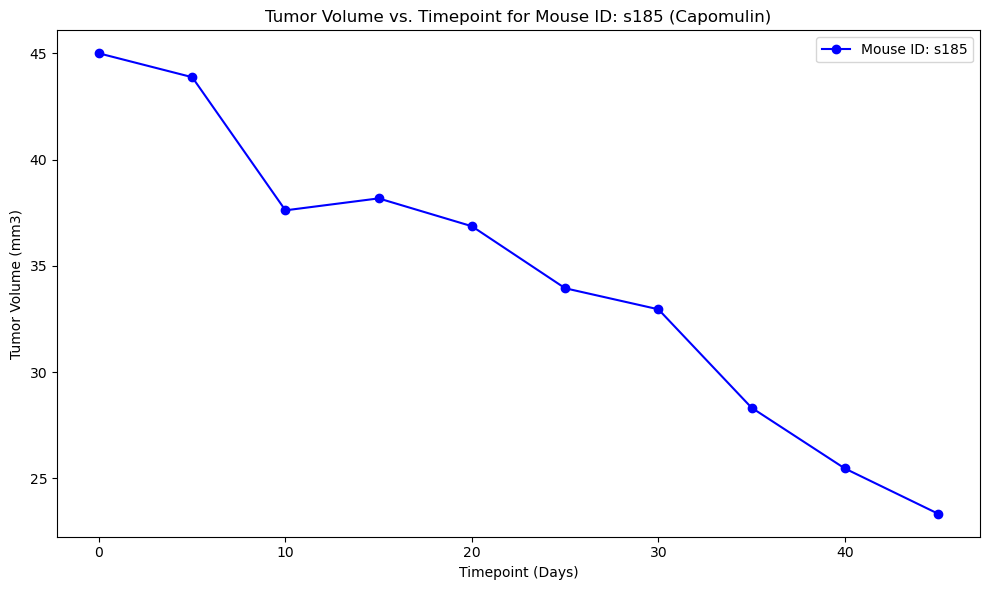

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-', marker='o', label=f'Mouse ID: {mouse_id}')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID: {mouse_id} (Capomulin)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

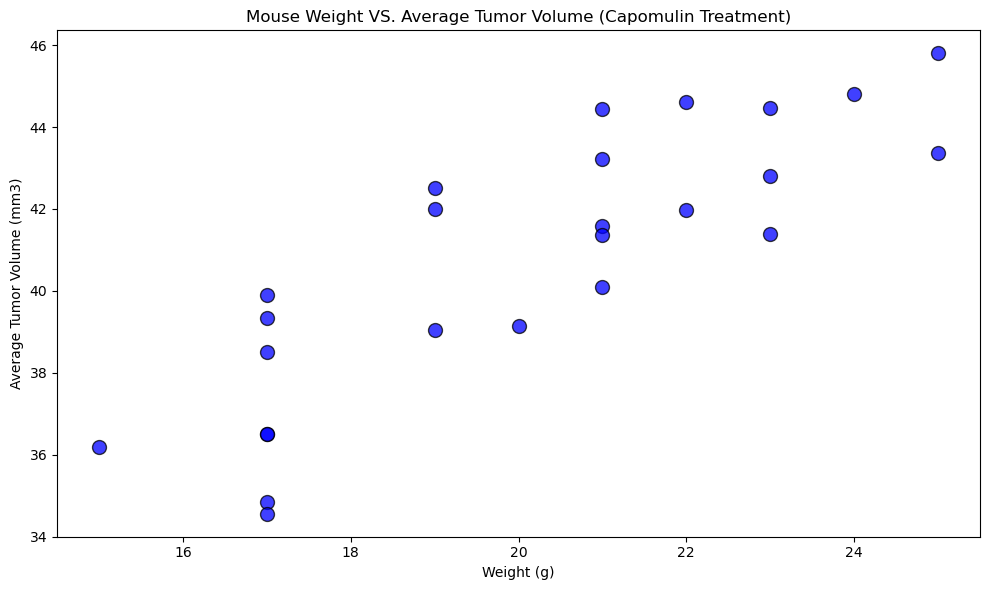

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight VS. Average Tumor Volume (Capomulin Treatment)')

plt.tight_layout()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


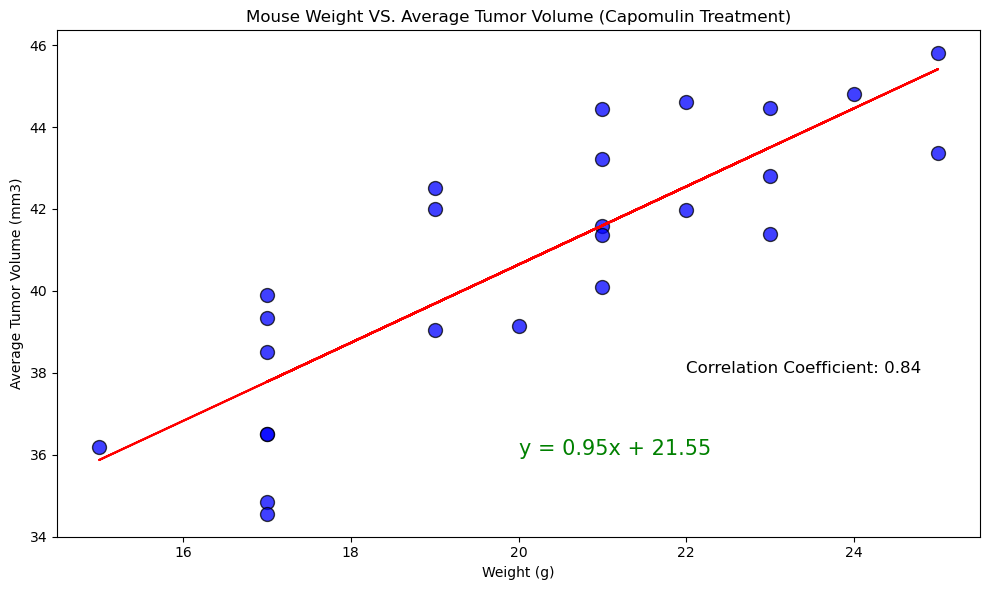

In [94]:
capomulin_regimen = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

correlation = round(st.pearsonr(mouse_weight, avg_tumor_volume)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75, label='Data Points')
plt.plot(mouse_weight, regress_values, 'r-', label='Linear Regression')
plt.annotate(line_eq, (20,36), fontsize=15, color='green')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight VS. Average Tumor Volume (Capomulin Treatment)')

plt.text(22, 38, f'Correlation Coefficient: {correlation}', fontsize=12, color='black')

plt.tight_layout()
plt.show()
